In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib
import matplotlib.pyplot as plt
from datetime import *

In [2]:
from dateutil import relativedelta
from __future__ import print_function

In [3]:
data = pd.read_csv('cohort-new.csv', low_memory=False)

In [4]:
data['MysqlDate'] = pd.to_datetime(data['MysqlDate'])


In [5]:
data = data[data['MysqlDate']<'2015-01-01']
data = data[data['MysqlDate']>'2011-12-31']

In [6]:
data['y_m'] = data['MysqlDate'].apply(lambda x: datetime(x.year,x.month,1))

In [7]:
#f_month = data[data['MysqlDate']<'2012-02-01'].copy()
#f_month = data[data['Revenue']=='NewRevenue']

In [8]:
#data = pd.concat([f_month,data[data['MysqlDate']>='2012-02-01'].copy()])

In [9]:
data_backup = data.copy()
data.set_index('y_m',inplace=True)
data.set_index('MysqlDate',append=True,inplace=True)


In [10]:
data.sort_index(0,inplace=True)

In [11]:
data[10:]

PID           Revenue Service Name  \
y_m        MysqlDate                                                    
2012-01-01 2012-01-01     RP0000004325            Others          CRM   
           2012-01-01     RP0000042951    AccrualRevenue   Mail Suite   
           2012-01-01  RP0000085329PP1    AccrualRevenue     Projects   
           2012-01-01     RP0000031628            Others     Projects   
           2012-01-01     RP0000023351    AccrualRevenue          CRM   
           2012-01-01     RP0000015477    AccrualRevenue          CRM   
           2012-01-01  RP0000085272PP1    AccrualRevenue          CRM   
           2012-01-01     RP0000043808    AccrualRevenue      Invoice   
           2012-01-01  RP0000085367PP1    AccrualRevenue      Invoice   
           2012-01-01  RP0000085095PP1    AccrualRevenue          CRM   
           2012-01-01     RP0000043933    AccrualRevenue     Projects   
           2012-01-01     RP0000043918    AccrualRevenue     Projects   
           2012-01-01     RP0000043948    AccrualRevenue     Projects   
           2012-01-01     RP0000007534    AccrualRevenue      Invoice   
           2012-01-01     RP0000043932    AccrualRevenue      Invoice   
           2012-01-01  RP0000085239PP1    AccrualRevenue      Meeting   
           2012-01-01  RP0000085473PP2    AccrualRevenue        Books   
           2012-01-01     RP0000020654    AccrualRevenue     Projects   
           2012-01-01  RP0000064553PP1    AccrualRevenue          CRM   
           2012-01-01  RP0000085353PP1    AccrualRevenue      Creator   
           2012-01-01     RP0000043905    AccrualRevenue      Reports   
           2012-01-01  RP0000085289PP1    AccrualRevenue      Creator   
           2012-01-01     RP0000043854    AccrualRevenue          CRM   
           2012-01-01     RP0000043859    AccrualRevenue          CRM   
           2012-01-01  RP0000085177PP1    AccrualRevenue      Creator   
           2012-01-01  RP0000085159PP2    AccrualRevenue      Creator   
           2012-01-01     RP0000011822    AccrualRevenue      Invoice   
           2012-01-01  RP0000085324PP1    AccrualRevenue          CRM   
           2012-01-01  RP0000085325PP1    AccrualRevenue          CRM   
           2012-01-01  RP0000085286PP1    AccrualRevenue      Creator   
...                                ...               ...          ...   
2014-12-01 2014-12-31          6242051  RecurringRevenue     Services   
           2014-12-31          6238322    UpgradeRevenue         Mail   
           2014-12-31          6242040  RecurringRevenue      Support   
           2014-12-31          6242042  RecurringRevenue      Creator   
           2014-12-31          6242044    UpgradeRevenue     CRM Plus   
           2014-12-31          6242044    UpgradeRevenue     CRM Plus   
           2014-12-31          6242050    UpgradeRevenue      Creator   
           2014-12-31          6242051  RecurringRevenue     Services   
           2014-12-31          6242051  RecurringRevenue     Services   
           2014-12-31          5004803  RecurringRevenue          CRM   
           2014-12-31          5004805        NewRevenue          CRM   
           2014-12-31          5004805        NewRevenue          CRM   
           2014-12-31          5004802  RecurringRevenue          CRM   
           2014-12-31          5004803  RecurringRevenue          CRM   
           2014-12-31          5004802  RecurringRevenue          CRM   
           2014-12-31          5CN-218        NewRevenue       People   
           2014-12-31          5CN-218        NewRevenue       People   
           2014-12-31          6238310        NewRevenue          CRM   
           2014-12-31          6238294        NewRevenue        Books   
           2014-12-31          6238297        NewRevenue          CRM   
           2014-12-31          6238297        NewRevenue          CRM   
           2014-12-31          6238297        NewRevenue     Campaign   
           2014-12-3

In [12]:
data.dropna(how='any',inplace=True)

In [13]:
data.to_pickle('data_root.pkl')

In [14]:
data_crm = data[data['Service Name']=='CRM']

In [90]:
data_invoice = data[data['Service Name']=='Invoice']
data_ms = data[data['Service Name']=='Mail Suite']
data_project = data[data['Service Name']=='Projects']

<h1> Top Products </h1>

In [82]:
service_mask = data['Service Name'].value_counts()>500
service_mask['CRM']

True

In [83]:
services = data['Service Name'].unique()
services

array(['CRM', 'Projects', 'Invoice', 'Site24x7', 'Mail Suite', 'Meeting',
       'Books', 'Creator', 'Reports', 'Docs', 'Recruit', 'Support',
       'Assist', 'Challenge', 'People', 'Discussions', 'Wiki', 'Campaigns',
       'On-Demand', 'SharePoint', 'API', 'Services', 'Commercial API',
       'ContactManager', 'ToonDoo', 'Sites', 'CommentBox', 'BugTracker',
       'Commercial API ', 'LiveDesk', 'Survey', 'Store', 'Connect',
       'Vault', 'SalesIQ', 'Domains', 'ZSM', 'zylkerrecruit', 'thehindu',
       'propertymobcrm'], dtype=object)

In [87]:
data['Service Name'].describe()

count     2873323
unique         40
top           CRM
freq      1276637
Name: Service Name, dtype: object

In [89]:
data['Service Name'].value_counts()

CRM                1276637
Invoice             310529
Mail Suite          260297
Projects            229526
Creator             197643
Site24x7            145481
Sites                67439
Recruit              65878
Support              50232
Campaigns            44770
Books                43939
Docs                 39789
Reports              34720
Meeting              23684
Assist               15952
On-Demand            12705
People                9933
Survey                9020
Wiki                  8665
Vault                 5806
Domains               4363
Challenge             3930
ContactManager        3454
Discussions           2920
LiveDesk              2391
SalesIQ                955
Connect                684
API                    506
Commercial API         430
SharePoint             391
Store                  255
ToonDoo                239
ZSM                     48
Services                46
BugTracker              32
Commercial API          15
CommentBox               8
z

In [84]:
top_services = [s for s in services if service_mask[s]==True]
top_services

['CRM',
 'Projects',
 'Invoice',
 'Site24x7',
 'Mail Suite',
 'Meeting',
 'Books',
 'Creator',
 'Reports',
 'Docs',
 'Recruit',
 'Support',
 'Assist',
 'Challenge',
 'People',
 'Discussions',
 'Wiki',
 'Campaigns',
 'On-Demand',
 'API',
 'ContactManager',
 'Sites',
 'LiveDesk',
 'Survey',
 'Connect',
 'Vault',
 'SalesIQ',
 'Domains']

In [288]:
data_filtered = data[data['Service Name'].apply(lambda x: x in top_services)]

In [289]:
df_backup_all = data_filtered.copy()
df = data_filtered

In [290]:
del df['Revenue']
del df['Pay Period']

In [291]:
df.set_index('Service Name',append=True,inplace=True)


In [293]:
df = df.swaplevel(1,2)

In [294]:
count_df = df.groupby(level=[0,1]).count()

In [295]:
count_df[:10]

PID
y_m        Service Name        
2012-01-01 API                1
           Assist            32
           Books             93
           CRM             1319
           Campaigns          5
           Challenge         21
           Commercial API     5
           ContactManager     1
           Creator          292
           Discussions        3

In [296]:
idx = pd.IndexSlice
y = count_df.loc[idx[:,'Invoice'],idx[:]]['PID']
y.index.levels[0]


DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name=u'y_m', freq=None)

In [297]:
def getXY(service):
    idx = pd.IndexSlice
    service_series = count_df.loc[idx[:,service],idx[:]]['PID']
    service_series = service_series.reset_index()
    x = service_series['y_m'].values
    y = service_series['PID'].values
    return x,y

In [298]:
services = df_backup_all['Service Name'].value_counts().index
services

Index([u'CRM', u'Invoice', u'Mail Suite', u'Projects', u'Creator', u'Site24x7',
       u'Sites', u'Recruit', u'Support', u'Campaigns', u'Books', u'Docs',
       u'Reports', u'Meeting', u'Assist', u'On-Demand', u'People', u'Survey',
       u'Wiki', u'Vault', u'Domains', u'ContactManager', u'Challenge',
       u'Discussions', u'LiveDesk', u'SalesIQ', u'Connect', u'SharePoint',
       u'API', u'Commercial API', u'Store'],
      dtype='object')

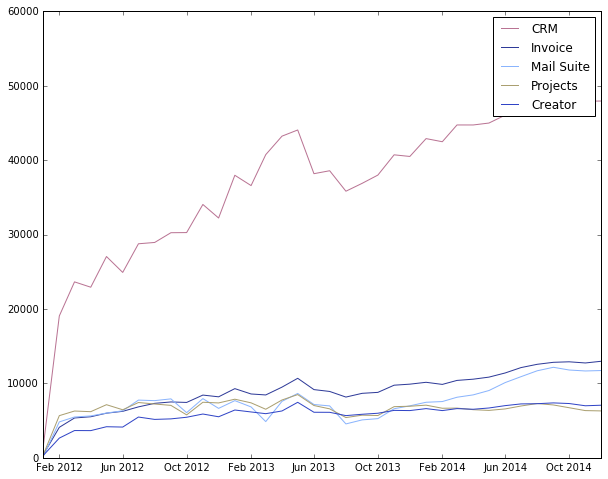

In [299]:
fig,ax = plt.subplots(figsize=(10,8))
colors = np.random.rand(len(services),3).tolist()
for i,s in enumerate(services[0:5]):
    x,y = getXY(s)
    ax.plot(x,y,'-',color= colors[i],label=s)
ax.legend()

<h1> Cohort Prediction for CRM </h1>


In [101]:
i = 0
pid_map = {}
pid_dmap = {}
month_2 = datetime(2012,2,1)
def pid_count(row):
    global i
    if i%5000==0:
        print(i,end="_")
    i+=1
    if row['Revenue']=='NewRevenue':
        pid_map[row['PID']]=1
        pid_dmap[row['PID']] = row['MysqlDate']
        return 1
    else:
        cv = pid_map.get(row['PID'],-1)
        if cv!=-1:
            m_now = row['MysqlDate']
            m_min = pid_dmap[row['PID']]
            m_offset = relativedelta.relativedelta(m_now,m_min).months
            pid_map[row['PID']]= cv+m_offset
            pid_dmap[row['PID']] = m_now
            return cv+m_offset
        else:
            return -1

In [102]:
def process_product_df(data_pro):
    data_pro = data_pro[data_pro['Pay Period']=='MONT']
    r_mask = data_pro['Revenue'].isin(['NewRevenue','RecurringRevenue'])
    data_pro = data_pro[r_mask]
    data_pro.dropna(how='any',inplace=True)
    del data_pro['Service Name']
    del data_pro['Pay Period']
    data_pro.reset_index(level=1,inplace=True)
    data_pro = data_pro.sort_index()
    data_pro.loc[::1,'counts'] = DataFrame(data_pro.loc[::1].apply(pid_count,axis=1))[0]
    data_pro = data_pro[data_pro['counts']!=-1]
    data_pro = data_pro[data_pro['counts']!=-11]
    data_pro = data_pro.dropna(how='any')
    data_pro.set_index('counts',append=True,inplace = True)
    del data_pro['MysqlDate']
    data_pro.reset_index(inplace=True)
    data_pro = data_pro.groupby(['y_m','counts']).count()
    data_pro = data_pro.unstack()
    data_pro.fillna(0,inplace=True)
    cohorts_pro = data_pro['PID'].copy()
    return cohorts_pro

In [93]:
cohorts_invoice = process_product_df(data_invoice.copy())

0_5000_10000_15000_20000_25000_30000_35000_40000_45000_50000_55000_60000_65000_70000_75000_80000_85000_90000_95000_100000_105000_110000_115000_120000_125000_130000_135000_140000_145000_150000_155000_

In [98]:
cohorts_ms = process_product_df(data_ms.copy())

0_5000_10000_15000_20000_25000_30000_35000_40000_45000_

In [105]:
cohorts_invoice

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,266,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-01,215,215,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01,199,193,185,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-01,172,176,190,159,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-05-01,191,150,167,174,144,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-01,183,165,138,156,162,122,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-07-01,189,165,149,126,157,151,113,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-01,209,173,142,131,119,150,142,106,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-01,197,164,149,144,118,124,135,131,103,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
cohorts_project = process_product_df(data_project.copy())

0_5000_10000_15000_20000_25000_30000_35000_40000_45000_50000_55000_60000_

In [104]:
cohorts_project

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,208,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-01,231,157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01,204,197,125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-01,162,166,160,112,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-05-01,224,132,143,126,94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-01,172,167,119,127,104,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-07-01,190,146,135,93,109,97,69,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-01,176,152,125,124,90,100,90,55,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-01,168,143,130,112,104,85,87,87,44,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dc_backup = data_crm.copy()

In [329]:
data_crm = dc_backup.copy()

In [16]:
data_crm = data_crm[data_crm['Pay Period']=='MONT']

In [17]:
r_mask = data_crm['Revenue'].isin(['NewRevenue','RecurringRevenue'])

In [18]:
data_crm = data_crm[r_mask]

In [19]:
data_crm['PID'].nunique()

57780

In [20]:
data_crm['PID'].value_counts()

RP0000067207PP1    39
RP0000058035       39
RP0000001910       39
RP0000064047PP1    39
RP0000006554       39
RP0000050263       39
RP0000050900       37
RP0000071230PP1    37
RP0000081655PP1    37
RP0000037803       37
RP0000034542       37
RP0000064026PP1    37
RP0000061491       37
RP0000067786PP1    37
RP0000077464PP1    37
RP0000038470       36
RP0000058212       36
RP0000090057PP1    36
RP0000091891PP1    36
RP0000034687       36
RP0000090081PP1    36
RP0000026263       36
RP0000010766       36
RP0000074590PP1    36
RP0000090248PP1    36
RP0000037058       36
RP0000075268PP1    36
RP0000067246PP1    36
RP0000027617       36
RP0000051860       36
                   ..
RP0000252149PP1     1
5004803             1
RP0000089535PP1     1
5004802             1
2064353             1
RP0000240539PP1     1
RP0000248282PP1     1
RP0000111171PP1     1
RP0000245639PP1     1
RP0000178471PP1     1
2081145             1
RP0000248982PP1     1
6139828             1
RP0000251767PP1     1
RP00001264

In [21]:
data_crm.describe()

,PID,Revenue,Service Name,Pay Period
count,656946,656946,656946,656946
unique,57780,2,1,1
top,RP0000067207PP1,RecurringRevenue,CRM,MONT
freq,39,609683,656946,656946


In [22]:
data_crm.dropna(how='any',inplace=True)

In [23]:
del data_crm['Service Name']
del data_crm['Pay Period']

In [24]:
data_crm[:10]

PID           Revenue
y_m        MysqlDate                                 
2012-01-01 2012-01-01  RP0000048742  RecurringRevenue
           2012-01-01  RP0000048781  RecurringRevenue
           2012-01-01  RP0000048726  RecurringRevenue
           2012-01-01  RP0000051449  RecurringRevenue
           2012-01-01  RP0000060237  RecurringRevenue
           2012-01-01  RP0000054564  RecurringRevenue
           2012-01-01  RP0000054615  RecurringRevenue
           2012-01-01  RP0000054617  RecurringRevenue
           2012-01-01  RP0000054641  RecurringRevenue
           2012-01-01  RP0000054648  RecurringRevenue

In [25]:
data_crm.count()

PID        656946
Revenue    656946
dtype: int64

In [26]:
data_crm = data_crm.dropna(how='any')
data_crm.count()

PID        656946
Revenue    656946
dtype: int64

In [27]:
data_crm['PID'].isnull().sum()

0

In [28]:
data_crm.reset_index(level=1,inplace=True)

In [29]:
data_crm[:10]

,MysqlDate,PID,Revenue
y_m,,,
2012-01-01,2012-01-01,RP0000048742,RecurringRevenue
2012-01-01,2012-01-01,RP0000048781,RecurringRevenue
2012-01-01,2012-01-01,RP0000048726,RecurringRevenue
2012-01-01,2012-01-01,RP0000051449,RecurringRevenue
2012-01-01,2012-01-01,RP0000060237,RecurringRevenue
2012-01-01,2012-01-01,RP0000054564,RecurringRevenue
2012-01-01,2012-01-01,RP0000054615,RecurringRevenue
2012-01-01,2012-01-01,RP0000054617,RecurringRevenue
2012-01-01,2012-01-01,RP0000054641,RecurringRevenue


In [30]:
i = 0
pid_map = {}
pid_dmap = {}
month_2 = datetime(2012,2,1)
def pid_count(row):
    global i
    if i%5000==0:
        print(i,end="_")
    i+=1
    if row['Revenue']=='NewRevenue':
        pid_map[row['PID']]=1
        pid_dmap[row['PID']] = row['MysqlDate']
        return 1
    else:
        cv = pid_map.get(row['PID'],-1)
        if cv!=-1:
            m_now = row['MysqlDate']
            m_min = pid_dmap[row['PID']]
            m_offset = relativedelta.relativedelta(m_now,m_min).months
            pid_map[row['PID']]= cv+m_offset
            pid_dmap[row['PID']] = m_now
            return cv+m_offset
        else:
            return -1

In [32]:
dc_s = data_crm[:].copy()

In [33]:
dc_s = dc_s.sort_index()


In [34]:
dc_s.loc[::1,'counts'] = DataFrame(dc_s.loc[::1].apply(pid_count,axis=1))[0]

0_5000_10000_15000_20000_25000_30000_35000_40000_45000_50000_55000_60000_65000_70000_75000_80000_85000_90000_95000_100000_105000_110000_115000_120000_125000_130000_135000_140000_145000_150000_155000_160000_165000_170000_175000_180000_185000_190000_195000_200000_205000_210000_215000_220000_225000_230000_235000_240000_245000_250000_255000_260000_265000_270000_275000_280000_285000_290000_295000_300000_305000_310000_315000_320000_325000_330000_335000_340000_345000_350000_355000_360000_365000_370000_375000_380000_385000_390000_395000_400000_405000_410000_415000_420000_425000_430000_435000_440000_445000_450000_455000_460000_465000_470000_475000_480000_485000_490000_495000_500000_505000_510000_515000_520000_525000_530000_535000_540000_545000_550000_555000_560000_565000_570000_575000_580000_585000_590000_595000_600000_605000_610000_615000_620000_625000_630000_635000_640000_645000_650000_655000_

In [35]:
dc_s.sort('counts',ascending=False)

C:\Users\gautham\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,MysqlDate,PID,Revenue,counts
y_m,,,,
2014-12-01,2014-12-17,RP0000089306PP1,RecurringRevenue,36
2014-12-01,2014-12-17,RP0000089218PP1,RecurringRevenue,36
2014-12-01,2014-12-29,RP0000091998PP1,RecurringRevenue,36
2014-12-01,2014-12-29,RP0000092027PP1,RecurringRevenue,36
2014-12-01,2014-12-15,RP0000088699PP1,RecurringRevenue,36
2014-12-01,2014-12-16,RP0000089091PP1,RecurringRevenue,36
2014-12-01,2014-12-16,RP0000089128PP1,RecurringRevenue,36
2014-12-01,2014-12-10,RP0000088423PP1,RecurringRevenue,36
2014-12-01,2014-12-25,RP0000091283PP1,RecurringRevenue,36


In [36]:
dc_s = dc_s[dc_s['counts']!=-1]

In [37]:
dc_s = dc_s[dc_s['counts']!=-11]

In [38]:
sum(dc_s.ix['2012-02-01','Revenue']=='RecurringRevenue')

904

In [39]:
dc_s[dc_s['Revenue']=='NewRevenue'].count()

MysqlDate    47263
PID          47263
Revenue      47263
counts       47263
dtype: int64

In [40]:
dc_s[dc_s['counts']==1].count()

MysqlDate    47304
PID          47304
Revenue      47304
counts       47304
dtype: int64

In [41]:
dc_s = dc_s.dropna(how='any')
dc_s.count()

MysqlDate    459565
PID          459565
Revenue      459565
counts       459565
dtype: int64

In [42]:
sum(dc_s.ix['2012-02-01','Revenue']!='NewRevenue')

904

In [43]:
crm_counts = dc_s.copy()

In [44]:
crm_counts.set_index('counts',append=True,inplace = True)

In [45]:
crm_counts[:10]

MysqlDate              PID     Revenue
y_m        counts                                        
2012-01-01 1      2012-01-01  RP0000088216PP1  NewRevenue
           1      2012-01-01  RP0000088198PP1  NewRevenue
           1      2012-01-01  RP0000088205PP1  NewRevenue
           1      2012-01-01  RP0000088208PP1  NewRevenue
           1      2012-01-01  RP0000088214PP1  NewRevenue
           1      2012-01-01  RP0000088217PP1  NewRevenue
           1      2012-01-01  RP0000088218PP1  NewRevenue
           1      2012-01-01  RP0000088219PP1  NewRevenue
           1      2012-01-01  RP0000088195PP1  NewRevenue
           1      2012-01-01  RP0000088193PP1  NewRevenue

In [46]:
del crm_counts['MysqlDate']


In [47]:
crm_counts.reset_index(inplace=True)

In [48]:
crm_counts = crm_counts.groupby(['y_m','counts']).count()

In [49]:
crm_counts

PID  Revenue
y_m        counts               
2012-01-01 1       1101     1101
2012-02-01 1       1017     1017
           2        903      903
2012-03-01 1       1157     1157
           2        916      916
           3        747      747
2012-04-01 1        945      945
           2       1018     1018
           3        833      833
           4        663      663
2012-05-01 1       1138     1138
           2        845      845
           3        941      941
           4        771      771
           5        585      585
2012-06-01 1       1136     1136
           2       1030     1030
           3        785      785
           4        842      842
           5        700      700
           6        524      524
2012-07-01 1       1163     1163
           2       1028     1028
           3        906      906
           4        726      726
           5        791      791
           6        656      656
           7        476      476
2012-08-01 1       1202     1202
           2       1101     1101
...                 ...      ...
2014-12-01 7        865      865
           8        847      847
           9        889      889
           10       835      835
           11       774      774
           12       684      684
           13       569      569
           14       602      602
           15       655      655
           16       570      570
           17       532      532
           18       548      548
           19       543      543
           20       481      481
           21       483      483
           22       495      495
           23       426      426
           24       434      434
           25       344      344
           26       340      340
           27       375      375
           28       289      289
           29       331      331
           30       256      256
           31       224      224
           32       240      240
           33       196      196
           34       213      213
           35       154      154
           36        69       69

[666 rows x 2 columns]

In [50]:
crm_cohort = crm_counts.copy()

In [51]:
crm_cohort = crm_cohort.unstack()

In [52]:
crm_cohort.fillna(0,inplace=True)

In [53]:
crm_cohort

PID                                                    ...  \
counts        1     2     3     4     5     6     7    8    9    10 ...   
y_m                                                                 ...   
2012-01-01  1101     0     0     0     0     0     0    0    0    0 ...   
2012-02-01  1017   903     0     0     0     0     0    0    0    0 ...   
2012-03-01  1157   916   747     0     0     0     0    0    0    0 ...   
2012-04-01   945  1018   833   663     0     0     0    0    0    0 ...   
2012-05-01  1138   845   941   771   585     0     0    0    0    0 ...   
2012-06-01  1136  1030   785   842   700   524     0    0    0    0 ...   
2012-07-01  1163  1028   906   726   791   656   476    0    0    0 ...   
2012-08-01  1202  1101   931   831   669   723   606  437    0    0 ...   
2012-09-01  1185  1093   987   853   751   639   656  560  404    0 ...   
2012-10-01  1343  1100   944   928   783   709   602  611  536  382 ...   
2012-11-01  1209  1223   977   872   865   730   648  561  566  500 ...   
2012-12-01  1049  1096  1070   909   889   802   683  619  532  540 ...   
2013-01-01  1601   977   983  1039   820   834   754  611  602  508 ...   
2013-02-01  1424  1408   900   931   944   773   762  717  561  562 ...   
2013-03-01  1443  1359  1283   846   892   889   753  743  686  546 ...   
2013-04-01  1504  1319  1207  1169   797   844   833  697  695  645 ...   
2013-05-01  1503  1353  1230  1129  1096   779   794  779  670  662 ...   
2013-06-01  1275  1371  1236  1147  1032  1004   730  724  729  629 ...   
2013-07-01  1376  1219  1296  1169  1071   979   954  708  701  692 ...   
2013-08-01  1178  1277  1130  1182  1081  1011   923  901  673  667 ...   
2013-09-01  1262  1101  1169  1060  1069  1016   941  865  850  641 ...   
2013-10-01  1376  1201  1028  1124   980   999   959  899  805  830 ...   
2013-11-01  1344  1262  1089   958  1022   940   962  892  854  759 ...   
2013-12-01  1120  1250  1177  1014   905   961   895  923  829  830 ...   
2014-01-01  1495  1044  1138  1098   971   838   888  857  864  801 ...   
2014-02-01  1564  1307   949  1045   992   912   786  838  813  810 ...   
2014-03-01  1631  1451  1235   902   952   943   876  768  800  779 ...   
2014-04-01  1494  1490  1300  1131   839   893   904  822  722  765 ...   
2014-05-01  1426  1397  1374  1187  1044   806   823  884  791  691 ...   
2014-06-01  1349  1328  1271  1268  1108   964   759  764  852  750 ...   
2014-07-01  1466  1240  1215  1193  1171  1068   926  719  744  819 ...   
2014-08-01  1428  1343  1129  1110  1136  1097  1001  865  696  709 ...   
2014-09-01  1462  1309  1236  1064  1010  1089  1011  951  811  659 ...   
2014-10-01  1449  1343  1212  1121  1009   963  1010  942  897  776 ...   
2014-11-01  1318  1281  1251  1125  1046   936   896  953  859  836 ...   
2014-12-01  1171  1213  1158  1153  1039   994   865  847  889  835 ...   

           Revenue                                              
counts          27   28   29   30   31   32   33   34   35  36  
y_m                                                             
2012-01-01       0    0    0    0    0    0    0    0    0   0  
2012-02-01       0    0    0    0    0    0    0    0    0   0  
2012-03-01       0    0    0    0    0    0    0    0    0   0  
2012-04-01       0    0    0    0    0    0    0    0    0   0  
2012-05-01       0    0    0    0    0    0    0    0    0   0  
2012-06-01       0    0    0    0    0    0    0    0    0   0  
2012-07-01       0    0    0    0    0    0    0    0    0   0  
2012-08-01       0    0    0    0    0    0    0    0    0   0  
2012-09-01       0    0    0    0    0    0    0    0    0   0  
2012-10-01       0    0    0    0    0    0    0    0    0   0  
2012-11-01       0    0    0    0    0    0    0    0    0   0  
2012-12-01       0    0    0    0    0    0    0    0    0   0  
2013-01-01       0    0    0    0    0    0    0    0    0   0  
2013-02-01       0    0    0    0    0    0    

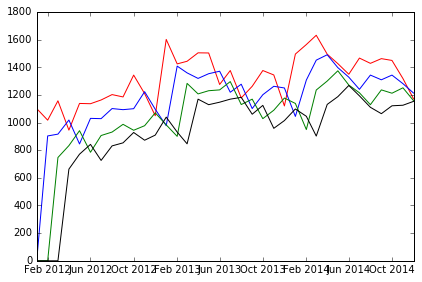

In [54]:
plt.plot(crm_cohort['PID'][1],c='red')
plt.plot(crm_cohort['PID'][2],c='blue')
plt.plot(crm_cohort['PID'][3],c='green')
plt.plot(crm_cohort['PID'][4],c='black')
plt.tight_layout()

In [376]:
#crm_cohort.to_csv('crm_cohort.csv')

In [14]:
#crm_cohort = pd.read_csv('crm_cohort.csv')

In [65]:
crm_cohort

PID                                                    ...  \
counts        1     2     3     4     5     6     7    8    9    10 ...   
y_m                                                                 ...   
2012-01-01  1101     0     0     0     0     0     0    0    0    0 ...   
2012-02-01  1017   903     0     0     0     0     0    0    0    0 ...   
2012-03-01  1157   916   747     0     0     0     0    0    0    0 ...   
2012-04-01   945  1018   833   663     0     0     0    0    0    0 ...   
2012-05-01  1138   845   941   771   585     0     0    0    0    0 ...   
2012-06-01  1136  1030   785   842   700   524     0    0    0    0 ...   
2012-07-01  1163  1028   906   726   791   656   476    0    0    0 ...   
2012-08-01  1202  1101   931   831   669   723   606  437    0    0 ...   
2012-09-01  1185  1093   987   853   751   639   656  560  404    0 ...   
2012-10-01  1343  1100   944   928   783   709   602  611  536  382 ...   
2012-11-01  1209  1223   977   872   865   730   648  561  566  500 ...   
2012-12-01  1049  1096  1070   909   889   802   683  619  532  540 ...   
2013-01-01  1601   977   983  1039   820   834   754  611  602  508 ...   
2013-02-01  1424  1408   900   931   944   773   762  717  561  562 ...   
2013-03-01  1443  1359  1283   846   892   889   753  743  686  546 ...   
2013-04-01  1504  1319  1207  1169   797   844   833  697  695  645 ...   
2013-05-01  1503  1353  1230  1129  1096   779   794  779  670  662 ...   
2013-06-01  1275  1371  1236  1147  1032  1004   730  724  729  629 ...   
2013-07-01  1376  1219  1296  1169  1071   979   954  708  701  692 ...   
2013-08-01  1178  1277  1130  1182  1081  1011   923  901  673  667 ...   
2013-09-01  1262  1101  1169  1060  1069  1016   941  865  850  641 ...   
2013-10-01  1376  1201  1028  1124   980   999   959  899  805  830 ...   
2013-11-01  1344  1262  1089   958  1022   940   962  892  854  759 ...   
2013-12-01  1120  1250  1177  1014   905   961   895  923  829  830 ...   
2014-01-01  1495  1044  1138  1098   971   838   888  857  864  801 ...   
2014-02-01  1564  1307   949  1045   992   912   786  838  813  810 ...   
2014-03-01  1631  1451  1235   902   952   943   876  768  800  779 ...   
2014-04-01  1494  1490  1300  1131   839   893   904  822  722  765 ...   
2014-05-01  1426  1397  1374  1187  1044   806   823  884  791  691 ...   
2014-06-01  1349  1328  1271  1268  1108   964   759  764  852  750 ...   
2014-07-01  1466  1240  1215  1193  1171  1068   926  719  744  819 ...   
2014-08-01  1428  1343  1129  1110  1136  1097  1001  865  696  709 ...   
2014-09-01  1462  1309  1236  1064  1010  1089  1011  951  811  659 ...   
2014-10-01  1449  1343  1212  1121  1009   963  1010  942  897  776 ...   
2014-11-01  1318  1281  1251  1125  1046   936   896  953  859  836 ...   
2014-12-01  1171  1213  1158  1153  1039   994   865  847  889  835 ...   

           Revenue                                              
counts          27   28   29   30   31   32   33   34   35  36  
y_m                                                             
2012-01-01       0    0    0    0    0    0    0    0    0   0  
2012-02-01       0    0    0    0    0    0    0    0    0   0  
2012-03-01       0    0    0    0    0    0    0    0    0   0  
2012-04-01       0    0    0    0    0    0    0    0    0   0  
2012-05-01       0    0    0    0    0    0    0    0    0   0  
2012-06-01       0    0    0    0    0    0    0    0    0   0  
2012-07-01       0    0    0    0    0    0    0    0    0   0  
2012-08-01       0    0    0    0    0    0    0    0    0   0  
2012-09-01       0    0    0    0    0    0    0    0    0   0  
2012-10-01       0    0    0    0    0    0    0    0    0   0  
2012-11-01       0    0    0    0    0    0    0    0    0   0  
2012-12-01       0    0    0    0    0    0    0    0    0   0  
2013-01-01       0    0    0    0    0    0    0    0    0   0  
2013-02-01       0    0    0    0    0    0    

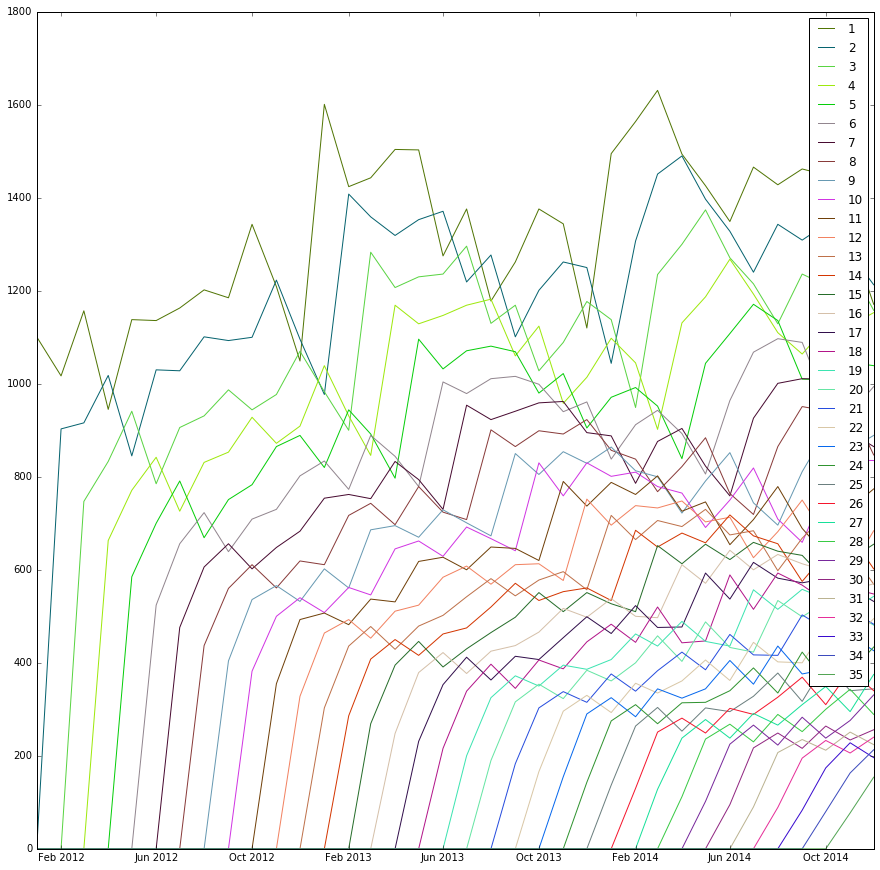

In [66]:
fig,ax = plt.subplots(figsize=(15,15))
colors = np.random.rand(36,3).tolist()
for m in range(1,36):
    ax.plot((crm_cohort['PID'][m]),'-',color= colors[m-1],label=m)
ax.legend()

<h1> Prediction </h1>

In [55]:
cc = crm_cohort.copy()

In [571]:
def getX(n,month):
    l_month = month
    l = []
    ind = []
    for i in range(n-1,1,-1):
        ind.append(month)
        l.append(crm_cohort['PID'].ix[month,i])
        month = month - relativedelta.relativedelta(months=1)
    month = month + relativedelta.relativedelta(months=1)
    return Series(l[::-1],index=ind[::-1])
        

In [572]:
def getXY(n,month):
    if n<6:
        X = crm_cohort['PID'][n][:month]
    else:
        X = getX(n,datetime.strptime(month,'%Y-%m-%d'))
    ewma = pd.stats.moments.ewma
    fwd = ewma(X, span = 2)
    bwd = ewma(X[::-1], span = 5 )
    c = np.vstack(( fwd, bwd[::-1] ))
    #c = fwd
    #avg_1 = c
    avg_1 = np.mean( c, axis=0 ) 
    return X,avg_1

In [573]:
from pandas.tseries.offsets import *
import statsmodels.api as sm


In [574]:
import calendar

def add_months(sourcedate,months):
        month = sourcedate.month - 1 + months
        year = int(sourcedate.year + month / 12 )
        month = month % 12 + 1
        day = min(sourcedate.day,calendar.monthrange(year,month)[1])
        return datetime(year,month,day)

In [575]:
start_date = datetime(2012,1,1)
def getforecast(ld_month):
    forecast = []
    for n in range(1,37):
        X,Y = getXY(n,ld_month)
        ts_data = pd.TimeSeries(Y,index=X.index)
        ts_log_data = np.log(ts_data)
        try:
            model = sm.tsa.ARMA(ts_log_data, order=(1,0)).fit()
        except:
            pass
        global start_date
        start_date = add_months(ts_log_data.index[-1],1).date()
        end_date = add_months(ts_log_data.index[-1],1).date()
        y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())
        y_forecast = np.exp(y_forecast)
        forecast.append(y_forecast[0])
    return forecast

In [576]:
forecast = getforecast('2014-11-01')
forecast

C:\Users\gautham\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: TimeSeries is deprecated. Please use Series


[1333.4577679701622,
 1264.0270141311817,
 1224.4115599465586,
 1106.1961764811153,
 1027.7330044158236,
 1102.8422375254456,
 972.6059034964685,
 928.13245081253342,
 979.4617421762224,
 878.96981031290613,
 858.45892038736042,
 747.57109516419098,
 609.63285622048011,
 650.97704766371032,
 688.96637744532222,
 629.16978738548653,
 562.3481998734228,
 572.76328555460759,
 568.66481498657413,
 519.23185726331769,
 518.272493440007,
 519.67243401631424,
 451.06803073406593,
 466.55053010371614,
 381.2894452629393,
 345.42558328661579,
 390.03371435939232,
 299.05429956275009,
 346.06712550966785,
 281.47124271874037,
 236.37572669166295,
 254.87424579970823,
 207.77626492269687,
 229.73998510916192,
 166.61282355208695,
 77.996510357692017]

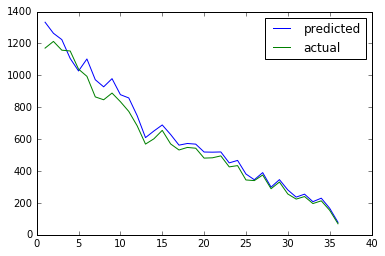

In [577]:
plt.plot(range(1,len(forecast)+1),forecast,label = 'predicted')
plt.plot(crm_cohort.ix[start_date.isoformat(),'PID'],c = 'green',label='actual')
plt.legend()

In [578]:
def percent_error(x,y):
    x = np.array(x)
    y = np.array(y)
    e = []
    for n in range(len(x)):
        diff = abs(x[n]-y[n])
        denom = x[n]
        e.append(diff/denom)
    return np.array(e).mean()*100

In [579]:
x = crm_cohort.ix[start_date.isoformat(),'PID']
y = forecast
e = percent_error(x,y)
print('the error in {0} is {1}%'.format(start_date.isoformat(),e))

the error in 2014-12-01 is 7.17311786925%


<h1> Predicting January 2015 cohorts </h1>

In [398]:
forecast = getforecast('2014-12-01')
forecast

C:\Users\gautham\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: TimeSeries is deprecated. Please use Series


[1227.6806090350608,
 1207.3490846451568,
 1152.8793174088737,
 1122.6990459311055,
 1020.036058788874,
 1106.5867260151165,
 1044.6782073069594,
 911.21633804302382,
 886.48746763432609,
 928.76740964737598,
 868.72468091128815,
 810.41913552070798,
 711.79694004885698,
 587.38839246099474,
 621.83487563298206,
 672.42529952384052,
 590.53523417437293,
 544.13822572475772,
 561.74342416943853,
 555.26798130168834,
 498.16652377711267,
 497.68778382155273,
 506.49826677675708,
 437.74759626410713,
 447.22696935950933,
 355.96202638712538,
 345.41433397719288,
 382.46757983716975,
 294.54052612158608,
 337.29401264473512,
 265.8626168750917,
 229.30095739332032,
 246.39779935646476,
 200.29883072985908,
 218.67683948481792,
 159.88454689488415]

In [399]:
p = Series(forecast,index=range(1,len(forecast)+1))
p2 = Series(np.array(crm_cohort.ix['2014-12-01']['PID']),index=range(1,len(forecast)+1))
p.name = datetime(2015,1,1)
p2.name = datetime(2014,12,1)
d = DataFrame([p,p2])
d

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
2015-01-01,1227.680609,1207.349085,1152.879317,1122.699046,1020.036059,1106.586726,1044.678207,911.216338,886.487468,928.76741,...,345.414334,382.46758,294.540526,337.294013,265.862617,229.300957,246.397799,200.298831,218.676839,159.884547
2014-12-01,1171.000000,1213.000000,1158.000000,1153.000000,1039.000000,994.000000,865.000000,847.000000,889.000000,835.00000,...,375.000000,289.00000,331.000000,256.000000,224.000000,240.000000,196.000000,213.000000,154.000000,69.000000


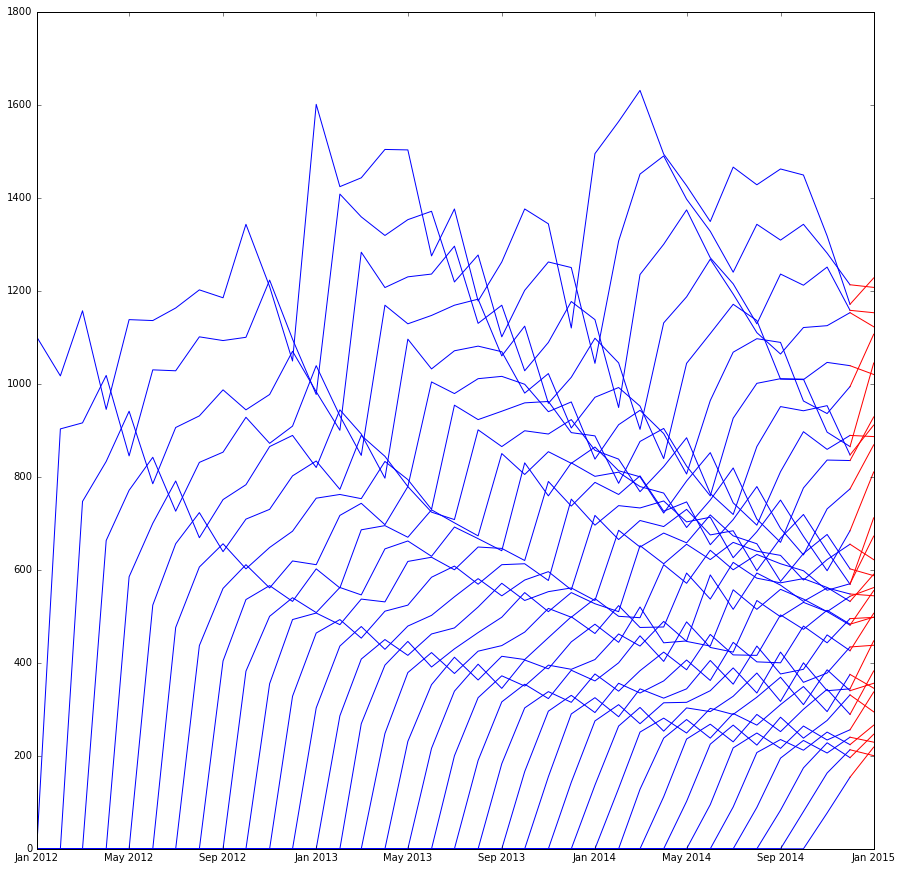

In [400]:
fig,ax = plt.subplots(figsize=(15,15))
colors = np.random.rand(5,3).tolist()
for m in range(1,36):
    ax.plot((crm_cohort['PID'][m]),'-',color= 'blue',label=m)
    ax.plot(d[m],c='red')

<h1> cohort Rectangle chart </h1>

In [56]:
cohorts = crm_cohort['PID'].copy()
cohorts

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-01,1017,903,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01,1157,916,747,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-01,945,1018,833,663,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-05-01,1138,845,941,771,585,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-01,1136,1030,785,842,700,524,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-07-01,1163,1028,906,726,791,656,476,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-01,1202,1101,931,831,669,723,606,437,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-01,1185,1093,987,853,751,639,656,560,404,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
cohorts = cohorts_ms.copy()

In [238]:
start_m = datetime(2012,1,1)
end_m = datetime(2014,12,1)
def process_col(col,n):
    m_val = start_m + relativedelta.relativedelta(months=n-1)
    m_val_end = end_m - relativedelta.relativedelta(months=n-1)
    col.loc[start_m:m_val_end] = col[m_val:end_m].values
    z_start = m_val_end + relativedelta.relativedelta(months=1)
    col.loc[z_start:end_m] = 0

In [239]:
for n in range(2,37):
    process_col(cohorts[n],n)

In [240]:
cohorts

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,60,34,32,25,19,18,15,15,14,14,...,7,7,7,7,7,7,7,7,7,6
2012-02-01,101,69,49,44,40,40,35,32,31,27,...,17,16,14,14,14,13,13,9,9,0
2012-03-01,85,64,57,48,46,41,41,37,34,30,...,10,10,9,8,8,9,8,7,0,0
2012-04-01,72,61,61,56,63,55,51,51,50,50,...,27,26,23,21,20,19,20,0,0,0
2012-05-01,95,74,68,56,52,48,46,40,41,39,...,27,27,29,27,23,21,0,0,0,0
2012-06-01,67,52,43,41,38,38,34,34,32,35,...,17,16,15,13,14,0,0,0,0,0
2012-07-01,88,64,51,47,42,41,37,37,34,35,...,18,20,21,20,0,0,0,0,0,0
2012-08-01,72,54,52,40,36,34,26,27,28,28,...,15,16,17,0,0,0,0,0,0,0
2012-09-01,70,51,42,37,34,34,27,27,28,27,...,13,12,0,0,0,0,0,0,0,0


In [132]:
test = cohorts.ix['2012-01-01'].copy()

In [133]:
def get_percents(row):
    in_val = row[1]
    row[1] = 100
    n = 2
    while n<=36 and row[n]!=0:
        val = row[n]
        row[n] = (val/in_val)*100
        #in_val = val
        n += 1

In [134]:
get_percents(test)
test

counts
1     100.000000
2      75.480769
3      60.096154
4      53.846154
5      45.192308
6      38.461538
7      33.173077
8      26.442308
9      21.153846
10     20.192308
11     17.788462
12     16.346154
13     14.903846
14     13.461538
15     12.980769
16     12.019231
17     12.019231
18     10.576923
19      9.615385
20      9.615385
21      8.173077
22      8.653846
23      7.692308
24      6.730769
25      6.730769
26      5.769231
27      5.769231
28      5.769231
29      5.769231
30      5.769231
31      5.288462
32      5.288462
33      5.288462
34      5.288462
35      4.807692
36      4.807692
Name: 2012-01-01 00:00:00, dtype: float64

In [135]:
mons = np.array(cohorts.index)
for mon in mons:
    get_percents(cohorts.ix[mon])

In [136]:
cohorts

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,100,75.480769,60.096154,53.846154,45.192308,38.461538,33.173077,26.442308,21.153846,20.192308,...,5.769231,5.769231,5.769231,5.769231,5.288462,5.288462,5.288462,5.288462,4.807692,4.807692
2012-02-01,100,85.281385,69.264069,54.545455,45.021645,41.991342,38.961039,37.662338,35.064935,27.705628,...,8.658009,8.225108,7.792208,7.792208,7.359307,6.493506,6.493506,5.194805,6.493506,0.000000
2012-03-01,100,81.372549,70.098039,62.254902,53.431373,49.019608,42.647059,41.176471,38.725490,33.823529,...,10.784314,9.803922,8.823529,9.313725,7.843137,6.862745,7.352941,7.352941,0.000000,0.000000
2012-04-01,100,81.481481,73.456790,57.407407,55.555556,52.469136,41.975309,38.888889,32.098765,32.098765,...,12.345679,13.580247,12.345679,11.111111,11.111111,9.876543,9.876543,0.000000,0.000000,0.000000
2012-05-01,100,74.553571,60.267857,55.357143,46.428571,41.964286,41.517857,37.500000,32.589286,28.125000,...,7.589286,7.142857,7.589286,7.142857,7.589286,6.696429,0.000000,0.000000,0.000000,0.000000
2012-06-01,100,84.883721,72.674419,65.116279,58.139535,51.162791,42.441860,37.209302,34.883721,26.162791,...,11.046512,9.302326,7.558140,7.558140,8.139535,0.000000,0.000000,0.000000,0.000000,0.000000
2012-07-01,100,80.000000,68.421053,60.000000,54.210526,48.947368,43.684211,40.526316,40.000000,36.315789,...,16.842105,15.789474,15.263158,15.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-08-01,100,81.250000,72.727273,60.795455,51.136364,44.886364,43.750000,36.363636,35.795455,30.113636,...,11.931818,10.227273,9.659091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-09-01,100,86.309524,69.642857,58.928571,55.952381,48.214286,45.238095,41.666667,38.690476,35.714286,...,13.095238,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [137]:
cohorts.to_pickle('cohorts_project.pkl')

In [3]:
cohorts = pd.read_csv('percent_cohort.csv')

In [67]:
import bokeh.plotting as bplt
from bokeh.models import HoverTool, ColumnDataSource
bplt.output_notebook()

BokehJS successfully loaded.

In [68]:
mon_index = cohorts.index
mon_index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name=u'y_m', freq=None)

In [69]:
b_cohorts = cohorts.copy()

In [70]:
b_cohorts = DataFrame(b_cohorts.stack())


In [71]:
b_cohorts.reset_index(inplace=True)

In [72]:
b_cohorts['percents'] = b_cohorts[0]
del b_cohorts[0]
b_cohorts.head()

,y_m,counts,percents
0,2012-01-01,1,100.000000
1,2012-01-01,2,82.016349
2,2012-01-01,3,67.847411
3,2012-01-01,4,60.217984
4,2012-01-01,5,53.133515


In [73]:
b_cohorts['colors'] = b_cohorts['percents'].apply(lambda x: (255 - max(int(255*(x-50)/50),0),min(int((x*255)/50),255),0))
b_cohorts['epoch'] = pd.DatetimeIndex(b_cohorts['y_m']).astype(np.int64)
b_cohorts['epoch'] = b_cohorts['y_m'].astype('string')
b_cohorts.head()

,y_m,counts,percents,colors,epoch
0,2012-01-01,1,100.000000,"(0, 255, 0)",2012-01-01
1,2012-01-01,2,82.016349,"(92, 255, 0)",2012-01-01
2,2012-01-01,3,67.847411,"(164, 255, 0)",2012-01-01
3,2012-01-01,4,60.217984,"(203, 255, 0)",2012-01-01
4,2012-01-01,5,53.133515,"(240, 255, 0)",2012-01-01


In [74]:
b_cohorts['colors'] = b_cohorts['colors'].apply(lambda x:('#%02x%02x%02x' % x).upper())

In [77]:
p = bplt.figure(width = 1000, height = 800,x_axis_location="below",
            y_axis_label='cohort',
            x_axis_label='months Since Initial Order',
            y_range= list(b_cohorts.epoch.unique())[::-1],
            x_range=[0.5,36.5],
            tools="resize,hover,save",)

In [78]:
# define rectangles
for m in list(b_cohorts.epoch.unique()):
    source = ColumnDataSource(b_cohorts[b_cohorts['y_m']==m])
    p.rect('counts','epoch',1,1,source=source,color='colors',alpha='percents',line_color=None)
p.rect('2014-01-01',36,0,0,color='#00FF00',legend='customer retention > 50%')
p.rect('2014-01-01',36,0,0,color='#FF0000',legend='customer retention < 50%')
p.rect('2014-01-01',36,0,0,color='#FFFF00',legend='customer retention = 50%')
p.legend.location = 'bottom_right'

In [79]:
# customize plot
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

In [80]:
# tooltip
from collections import OrderedDict
hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('initial purchare', '@epoch'),
    ('months after IP', '@counts'),
    ('percentage', '@percents%'),
])

In [81]:
# show the plot
bplt.show(p) 

In [194]:
cp = cohorts_project.copy()
ci = cohorts_invoice.copy()

In [236]:
cohorts_ms

counts,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
y_m,,,,,,,,,,,,,,,,,,,,,
2012-01-01,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-01,101,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01,85,69,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-01,72,64,49,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-05-01,95,61,57,44,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-06-01,67,74,61,48,40,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-07-01,88,52,68,56,46,40,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-01,72,64,43,56,63,41,35,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-01,70,54,51,41,52,55,41,32,14,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
cp['pname'] = 'project'

In [196]:
cp = cp.set_index('pname',append=True)

In [198]:
cp = cp.swaplevel(0,1)

In [199]:
ci['pname'] = 'invoice'

In [200]:
ci = ci.set_index('pname',append=True)

In [201]:
ci = ci.swaplevel(0,1)

In [228]:
cip = pd.concat([ci,cp])

In [229]:
cip = DataFrame(cip.stack())

In [230]:
cip.reset_index(inplace = True)

In [231]:
cip

,pname,y_m,counts,0
0,invoice,2012-01-01,1,266
1,invoice,2012-01-01,2,0
2,invoice,2012-01-01,3,0
3,invoice,2012-01-01,4,0
4,invoice,2012-01-01,5,0
5,invoice,2012-01-01,6,0
6,invoice,2012-01-01,7,0
7,invoice,2012-01-01,8,0
8,invoice,2012-01-01,9,0
9,invoice,2012-01-01,10,0


In [232]:
cip['epoch'] = pd.DatetimeIndex(cip['y_m']).astype(np.int64)
cip['epoch'] = cip['y_m'].astype('string')

In [220]:
cip

,pname,y_m,counts,0,epoch
0,invoice,2012-01-01,1,266,2012-01-01
1,invoice,2012-01-01,2,0,2012-01-01
2,invoice,2012-01-01,3,0,2012-01-01
3,invoice,2012-01-01,4,0,2012-01-01
4,invoice,2012-01-01,5,0,2012-01-01
5,invoice,2012-01-01,6,0,2012-01-01
6,invoice,2012-01-01,7,0,2012-01-01
7,invoice,2012-01-01,8,0,2012-01-01
8,invoice,2012-01-01,9,0,2012-01-01
9,invoice,2012-01-01,10,0,2012-01-01


In [235]:
cip[cip['y_m'].isin(pd.date_range('2012-01-01','2013-01-01',freq='MS'))]

,pname,y_m,counts,0,epoch
0,invoice,2012-01-01,1,266,2012-01-01
1,invoice,2012-01-01,2,0,2012-01-01
2,invoice,2012-01-01,3,0,2012-01-01
3,invoice,2012-01-01,4,0,2012-01-01
4,invoice,2012-01-01,5,0,2012-01-01
5,invoice,2012-01-01,6,0,2012-01-01
6,invoice,2012-01-01,7,0,2012-01-01
7,invoice,2012-01-01,8,0,2012-01-01
8,invoice,2012-01-01,9,0,2012-01-01
9,invoice,2012-01-01,10,0,2012-01-01


In [234]:
pd.date_range('2012-01-01','2013-01-01',freq='MS')

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [207]:
epo_in = cip.set_index('epoch')

In [208]:
cip_now = cip.loc['2012-01-01':'2012-03-01'].copy()

KeyError: "Cannot get left slice bound for non-unique label: '2012-01-01'"

In [185]:
cip_now

,pname,counts,0
y_m,,,
2012-01-01,invoice,1,266
2012-01-01,invoice,2,0
2012-01-01,invoice,3,0
2012-01-01,invoice,4,0
2012-01-01,invoice,5,0
2012-01-01,invoice,6,0
2012-01-01,invoice,7,0
2012-01-01,invoice,8,0
2012-01-01,invoice,9,0
